## Objective: 
- Learn simple linear regression for predictive analysis. 
## Experiment:
- Implement simple linear regression to predict house prices based on features such as area and number of rooms.
- Evaluate the model using metrics such as `mean_squared_error` and `r2_score.`
- Visualize the regression line on a scatter plot of the data

In [1]:
# imports and load datset


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import csv

dt = pd.read_excel("HP.xlsx")
with open('HP.csv', 'w') as f:
    writer = csv.writer(f)
    writer.writerow(dt.columns)
    for index, row in dt.iterrows():
        writer.writerow(row)

df = pd.read_csv("HP.csv")
print(df.head(10))

   Id  MSSubClass MSZoning  LotArea LotConfig BldgType  OverallCond  \
0   0          60       RL     8450    Inside     1Fam            5   
1   1          20       RL     9600       FR2     1Fam            8   
2   2          60       RL    11250    Inside     1Fam            5   
3   3          70       RL     9550    Corner     1Fam            5   
4   4          60       RL    14260       FR2     1Fam            5   
5   5          50       RL    14115    Inside     1Fam            5   
6   6          20       RL    10084    Inside     1Fam            5   
7   7          60       RL    10382    Corner     1Fam            6   
8   8          50       RM     6120    Inside     1Fam            5   
9   9         190       RL     7420    Corner   2fmCon            6   

   YearBuilt  YearRemodAdd Exterior1st  BsmtFinSF2  TotalBsmtSF  SalePrice  
0       2003          2003     VinylSd         0.0        856.0   208500.0  
1       1976          1976     MetalSd         0.0       1262.0 

In [3]:
# Exploring
print("The shape of the df is: ",end = "")
print(df.shape)
print(df.info())

The shape of the df is: (2919, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            2919 non-null   int64  
 1   MSSubClass    2919 non-null   int64  
 2   MSZoning      2915 non-null   object 
 3   LotArea       2919 non-null   int64  
 4   LotConfig     2919 non-null   object 
 5   BldgType      2919 non-null   object 
 6   OverallCond   2919 non-null   int64  
 7   YearBuilt     2919 non-null   int64  
 8   YearRemodAdd  2919 non-null   int64  
 9   Exterior1st   2918 non-null   object 
 10  BsmtFinSF2    2918 non-null   float64
 11  TotalBsmtSF   2918 non-null   float64
 12  SalePrice     1460 non-null   float64
dtypes: float64(3), int64(6), object(4)
memory usage: 296.6+ KB
None


In [4]:
# finding about the dataset

obj = (df.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:",len(object_cols) )

int = (df.dtypes == 'int')
num_cols = list(int[int].index)
print("Integer variables:",len(num_cols))


fl = (df.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:",len(fl_cols))

Categorical variables: 4
Integer variables: 6
Float variables: 3


<Axes: >

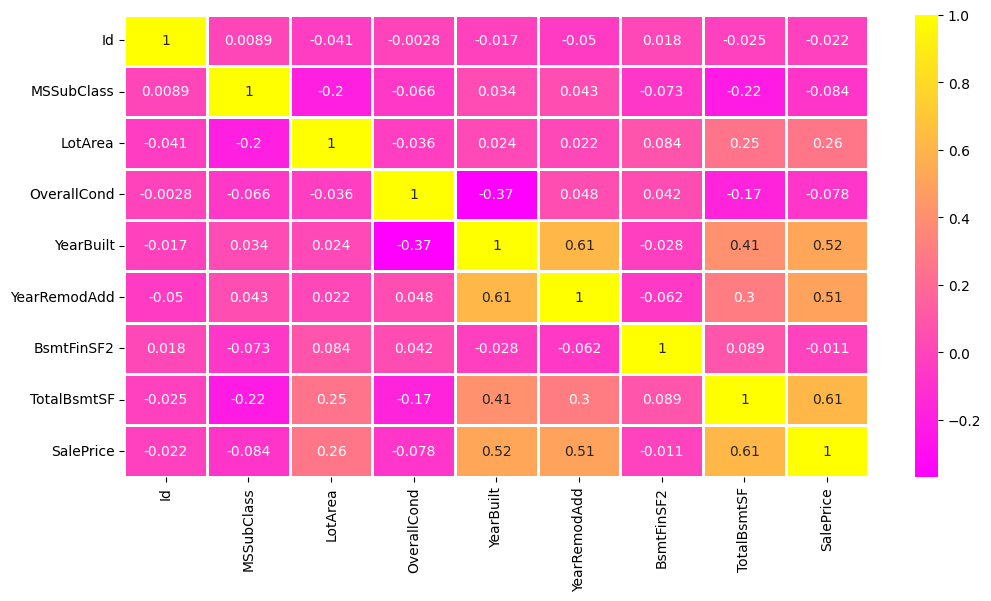

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
num_dat = df.select_dtypes(include=['number'])

# making correlation heatmap
plt.figure(figsize=(12,6))
sns.heatmap(num_dat.corr(), annot=True, cmap='spring',linewidths=2)


<Axes: title={'center': 'No. of Unique values'}>

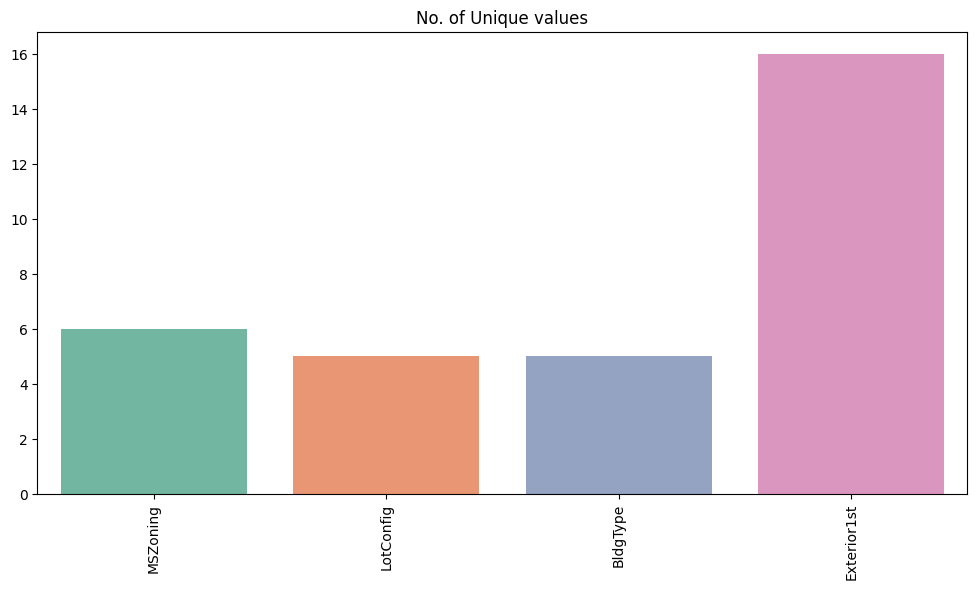

In [6]:
uv = []

for c in object_cols:
    uv.append(df[c].unique().size)
plt.figure(figsize=(12,6))
plt.title("No. of Unique values")
plt.xticks(rotation=90)
sns.barplot(x=object_cols, y=uv,hue=object_cols,palette='Set2')

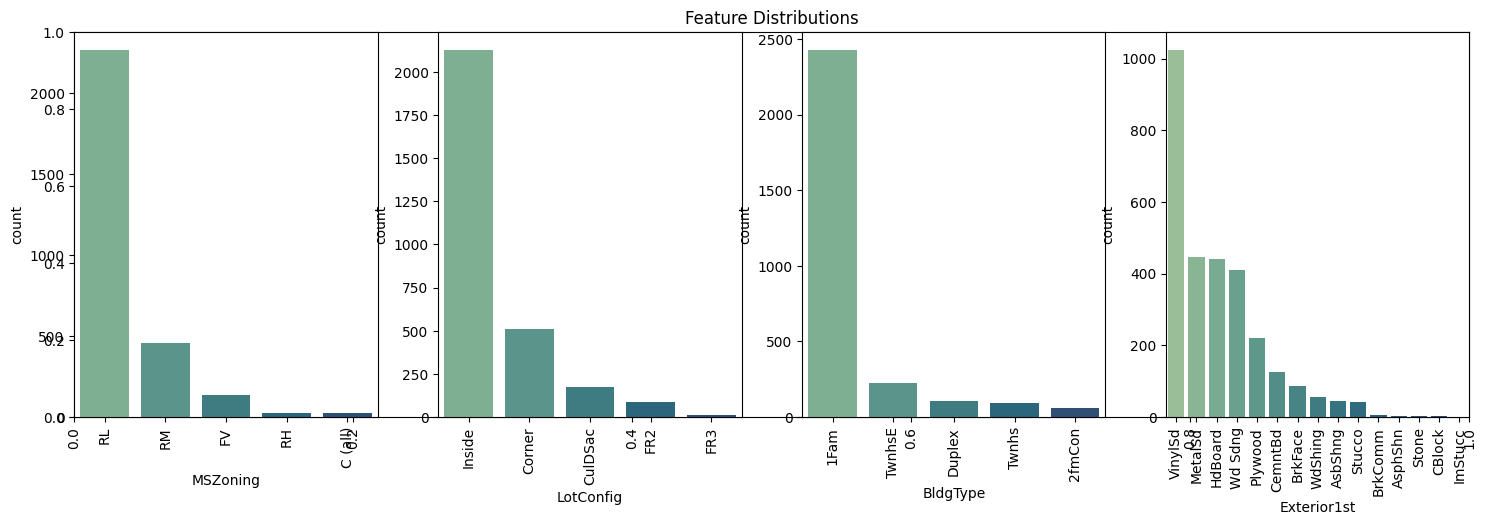

In [29]:
plt.figure(figsize=(18,5))
plt.title("Feature Distributions")
plt.xticks(rotation=90)
index = 1

for c in object_cols:
    y = df[c].value_counts()
    plt.subplot(1,4,index)
    plt.xticks(rotation=90)
    sns.barplot(x=y.index, y=y,palette='crest',hue=y.index)
    index += 1



In [8]:
# Data Cleaning and Preprocessing

df.drop(["Id"],axis=1,inplace=True) # dropping as not needed anyway


In [9]:
# putting mean and median in place of missing values
df["LotArea"] = df["LotArea"].fillna(df["LotArea"].mean())
df["TotalBsmtSF"] = df["TotalBsmtSF"].fillna(df["TotalBsmtSF"].mean())
df["SalePrice"] = df["SalePrice"].fillna(df["SalePrice"].mean())

# duplicates remov

df = df.drop_duplicates()

In [10]:
# Missing value remove

new_df = df.dropna()

In [11]:
# Check if any null remains 

new_df.isnull().sum()

MSSubClass      0
MSZoning        0
LotArea         0
LotConfig       0
BldgType        0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
Exterior1st     0
BsmtFinSF2      0
TotalBsmtSF     0
SalePrice       0
dtype: int64

In [12]:
# Feature selected


X = df[["LotArea", "TotalBsmtSF"]]
y = df["SalePrice"]

In [13]:
from sklearn.preprocessing import OneHotEncoder

# converting category to numerical values
s = (new_df.dtypes == 'object')
object_cols = list(s[s].index)
print("categorical variables:")
print(object_cols)
print("No. of categorical variables:",len(object_cols) )

categorical variables:
['MSZoning', 'LotConfig', 'BldgType', 'Exterior1st']
No. of categorical variables: 4


In [14]:
# 
OH_encoder = OneHotEncoder(sparse_output=False, handle_unknown="ignore")
OH_cols = pd.DataFrame(OH_encoder.fit_transform(new_df[object_cols]))
OH_cols.index = new_df.index
OH_cols.columns = OH_encoder.get_feature_names_out()
df_final = new_df.drop(object_cols, axis=1)
df_final = pd.concat([df_final, OH_cols], axis=1)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [16]:
# Lenear Regression Model

model = LinearRegression()
model.fit(X_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [17]:
# Predicting the Test set results
y_pred = model.predict(X_test)

In [18]:
# Testing the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R squared Score:", r2)
# Mean absolute Error
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

Mean Squared Error: 2744456389.9558983
R squared Score: 0.24728351896736878
Mean Absolute Error: 33774.03631300439


In [19]:
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

Intercept: 120338.31527469297
Coefficients: [ 1.00194364 47.31687102]


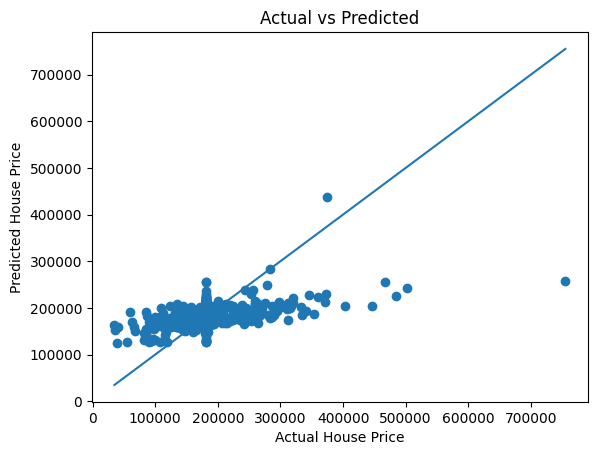

In [20]:
# Scatter plot

plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()])
plt.xlabel("Actual House Price")
plt.ylabel("Predicted House Price")
plt.title("Actual vs Predicted")
plt.show()  